# Classification Case Study  - Whether to grant loan or not

### Import libraries 

In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

### Load data 

In [2]:
# Read data
train =  pd.read_csv("loan_train.csv")

In [4]:
train.shape

(614, 13)

In [5]:
# Features in the dataset
train.columns

Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'LoanStatus'],
      dtype='object')

### Understand data 

In [7]:
train.sample(5)

,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
426,LP002367,Female,No,1,Not Graduate,No,4606,0.0,81.0,360.0,1.0,Rural,N
523,LP002693,Male,Yes,2,Graduate,Yes,7948,7166.0,480.0,360.0,1.0,Rural,Y
482,LP002537,Male,Yes,0,Graduate,No,2083,3150.0,128.0,360.0,1.0,Semiurban,Y
480,LP002534,Female,No,0,Not Graduate,No,4350,0.0,154.0,360.0,1.0,Rural,Y
518,LP002683,Male,No,0,Graduate,No,4683,1915.0,185.0,360.0,1.0,Semiurban,N


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoanID             614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   SelfEmployed       582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   LoanAmountTerm     600 non-null    float64
 10  CreditHistory      564 non-null    float64
 11  PropertyArea       614 non-null    object 
 12  LoanStatus         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [391]:
train[['ApplicantIncome','CoapplicantIncome','LoanAmount', 'LoanAmountTerm']].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [392]:
train[['Gender','Married','Dependents','Education','SelfEmployed','PropertyArea']].describe(include='all')

,Gender,Married,Dependents,Education,SelfEmployed,PropertyArea
count,601,611,599,614,582,614
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Semiurban
freq,489,398,345,480,500,233


In [393]:
train.isnull().sum()  # Count no. of null values for each column

LoanID                0
Gender               13
Married               3
Dependents           15
Education             0
SelfEmployed         32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
LoanAmountTerm       14
CreditHistory        50
PropertyArea          0
LoanStatus            0
dtype: int64

## Univariate Analysis

### Univariate Analysis for Categorical Variables 

In [6]:
train['LoanStatus'].value_counts()

LoanStatus
Y    422
N    192
Name: count, dtype: int64

In [7]:
# Normalize can be set to True to print proportions instead of number 
train['LoanStatus'].value_counts(normalize=True)

LoanStatus
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

<Axes: xlabel='LoanStatus', ylabel='count'>

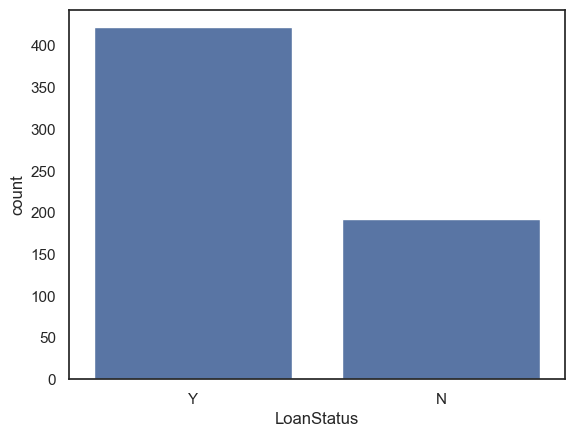

In [8]:
# Bar graph for loan_status
sns.countplot(x="LoanStatus", data=train)

In [397]:
train['Gender'].value_counts(normalize=True)

Gender
Male      0.813644
Female    0.186356
Name: proportion, dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

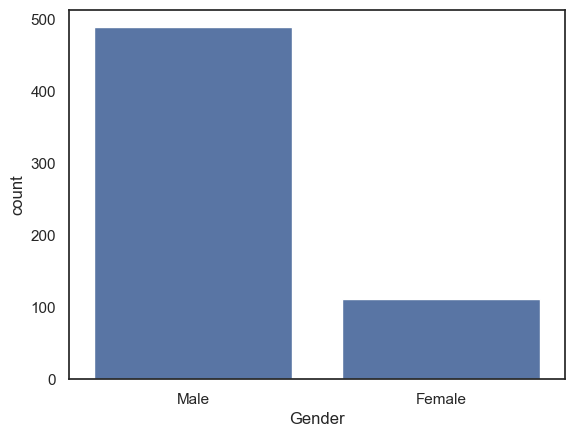

In [398]:
# Bar Graph for Gender
sns.countplot(x="Gender",data=train)

In [399]:
train['Dependents'].fillna('NA').value_counts()

Dependents
0     345
1     102
2     101
3+     51
NA     15
Name: count, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

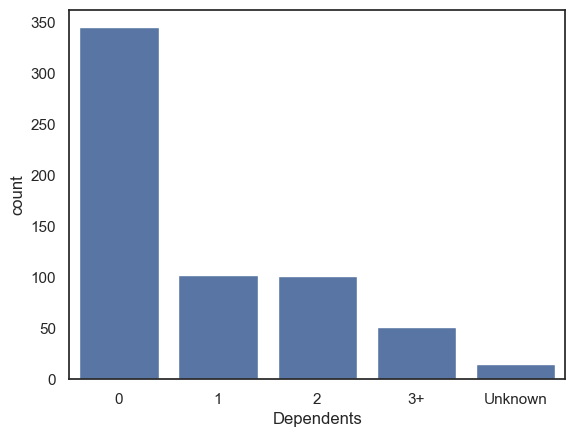

In [400]:
# Bar graph for dependents 
sns.countplot(x = train['Dependents'].fillna('Unknown'))

In [401]:
train['Education'].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

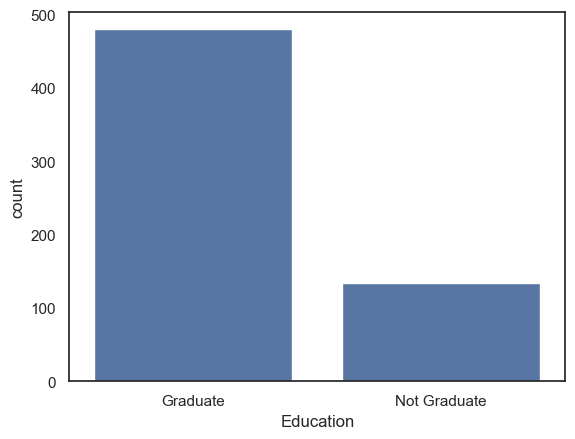

In [402]:
sns.countplot(x = "Education", data=train)

In [403]:
train['SelfEmployed'].value_counts()

SelfEmployed
No     500
Yes     82
Name: count, dtype: int64

<Axes: xlabel='SelfEmployed', ylabel='count'>

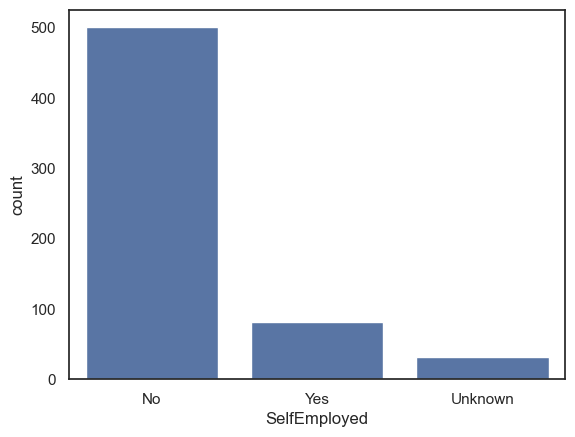

In [404]:
# Bar graph of SelfEmployed
sns.countplot(x= train['SelfEmployed'].fillna('Unknown'))

In [405]:
train.CreditHistory.fillna('Unknown').value_counts()

CreditHistory
1.0        475
0.0         89
Unknown     50
Name: count, dtype: int64

<Axes: xlabel='CreditHistory', ylabel='count'>

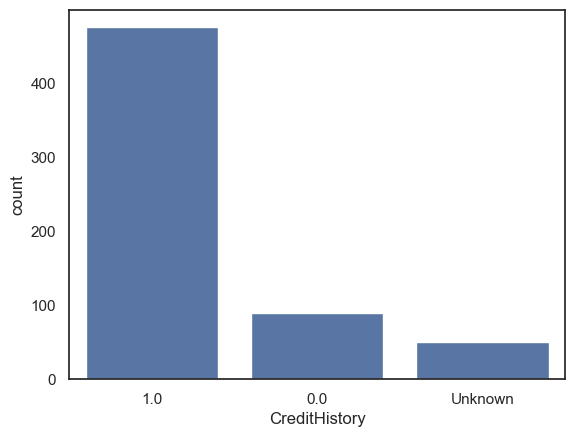

In [406]:
# Bar graph of Credit_History
sns.countplot(x = train.CreditHistory.fillna('Unknown'))

In [407]:
train['CreditHistory'].fillna('Unknown').value_counts(normalize=True)

CreditHistory
1.0        0.773616
0.0        0.144951
Unknown    0.081433
Name: proportion, dtype: float64

In [408]:
train['PropertyArea'].value_counts()

PropertyArea
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

<Axes: xlabel='PropertyArea', ylabel='count'>

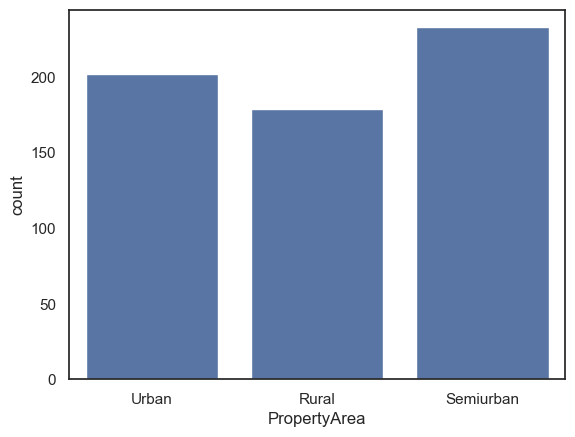

In [409]:
# Bar graph of Property_Area
sns.countplot(x='PropertyArea',data=train)

<Axes: xlabel='Married', ylabel='count'>

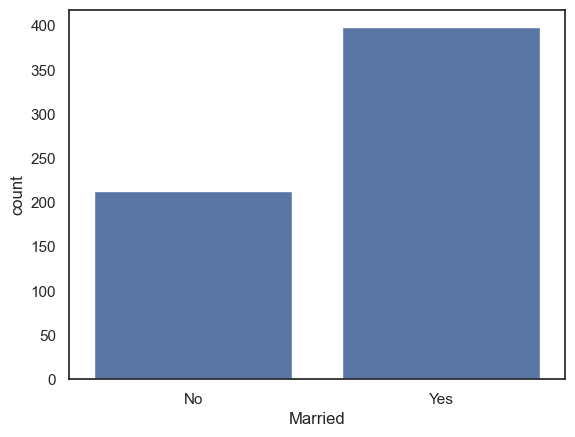

In [410]:
# Bar Graph for Married
sns.countplot(x="Married",data=train)

In [411]:
train.pivot_table(columns="Married",index="Dependents", values="LoanID", aggfunc=len)

Married,No,Yes
Dependents,,
0,171,174
1,23,79
2,8,93
3+,7,44


In [412]:
print(train['SelfEmployed'].isnull().sum())   # Missing count 
print(train['Gender'].isnull().sum())   # Missing count 
print(train['Married'].isnull().sum())   # Missing count 
print(train['CreditHistory'].isnull().sum())   # Missing count 
print(train['Dependents'].isnull().sum())   # Missing count 

32
13
3
50
15


###  Univariate Analysis for Continous Variables 

<Axes: >

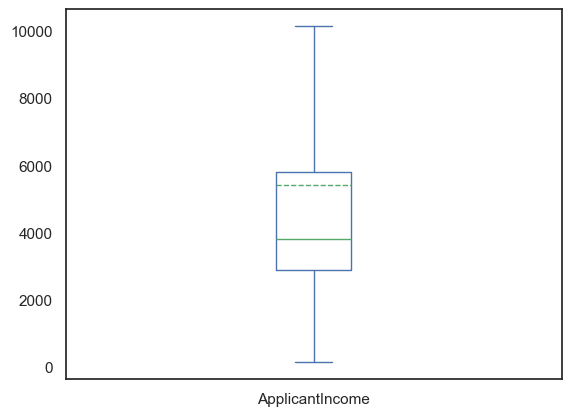

In [10]:
# Visualizing numerical features
#plt.gcf().set_size_inches(5,8)
train.ApplicantIncome.plot.box(showfliers=False, meanline=True, showmeans = True)
# sns.boxplot(x="ApplicantIncome",data=train, orient='vertical', showfliers=False, meanline=True, showmeans=True)

#### Display how many outliers in ApplicantIncome 

In [414]:
app_income = train["ApplicantIncome"]

In [415]:
q1,q2,q3 = app_income.quantile([0.25,0.5,0.75])
print(q1,q2,q3)

2877.5 3812.5 5795.0


In [416]:
iqr = q3 - q1

In [417]:
iqr

2917.5

In [418]:
print("Upper Limit     : ", (q3 + 1.5 * iqr))
print("Lower Limit     : ", (q1 - 1.5 * iqr))
print("Higher outliers : ", (app_income > (q3 + 1.5 * iqr)).sum())
print("Lower  outliers : ", (app_income < (q1 - 1.5 * iqr)).sum())

Upper Limit     :  10171.25
Lower Limit     :  -1498.75
Higher outliers :  50
Lower  outliers :  0


<Axes: xlabel='ApplicantIncome', ylabel='Count'>

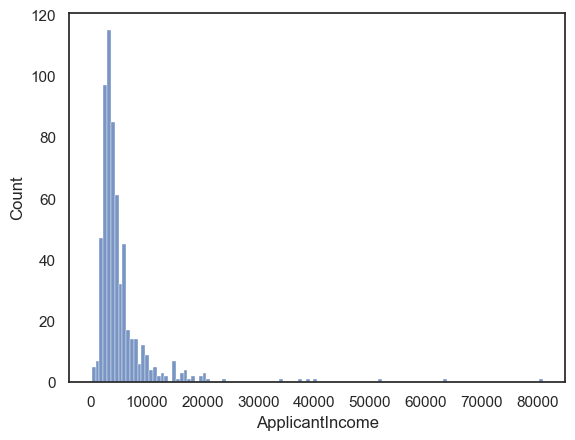

In [419]:
sns.histplot(train.ApplicantIncome)

In [420]:
np.log(100), np.log(10000)   # Log Transformation

(4.605170185988092, 9.210340371976184)

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

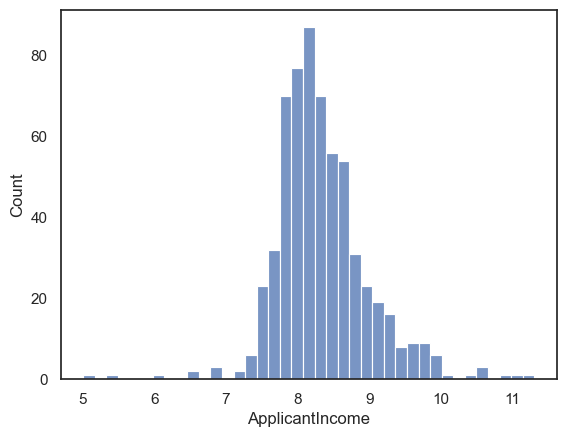

In [421]:
sns.histplot(np.log(train.ApplicantIncome))  # After log transformation 

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

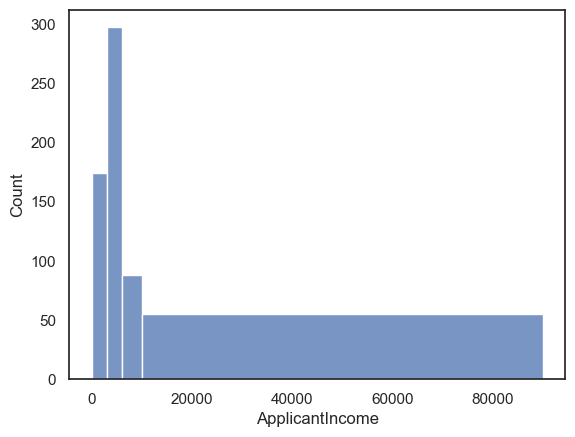

In [11]:
sns.histplot(train["ApplicantIncome"],bins=[0,3000,6000,10000,90000])    # Histogram
# plt.gcf().set_size_inches(10,5)

<Axes: >

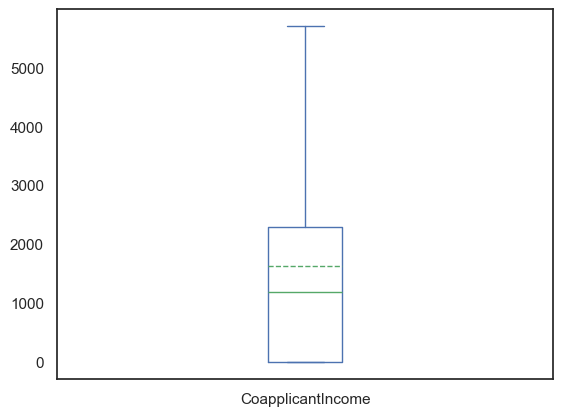

In [12]:
train.CoapplicantIncome.plot.box(showmeans=True, meanline=True, showfliers = False)

<Axes: xlabel='CoapplicantIncome', ylabel='Count'>

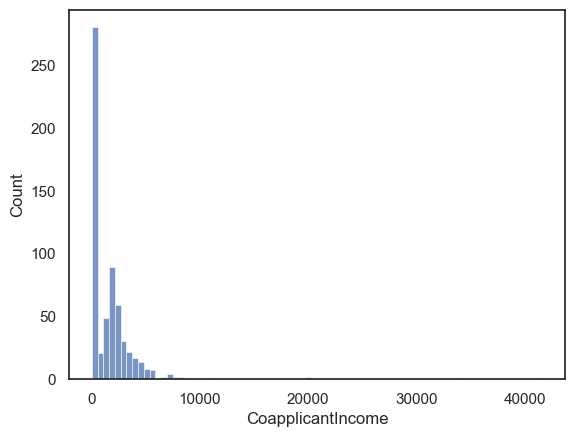

In [424]:
sns.histplot(train.CoapplicantIncome)

<Axes: xlabel='LoanAmount', ylabel='Count'>

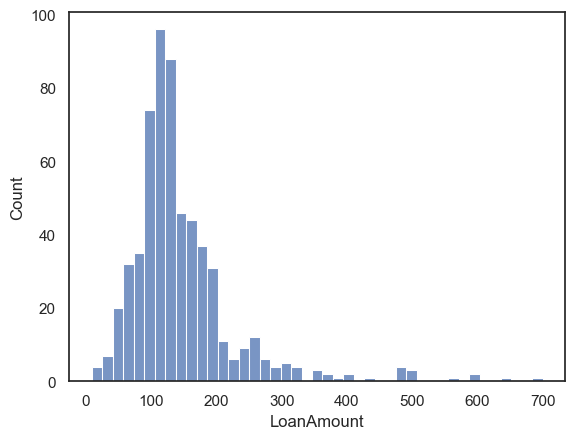

In [425]:
sns.histplot(train.LoanAmount)

In [426]:
np.log(10), 2.718 ** 2.3

(2.302585092994046, 9.971804156981486)

<Axes: xlabel='LoanAmount', ylabel='Count'>

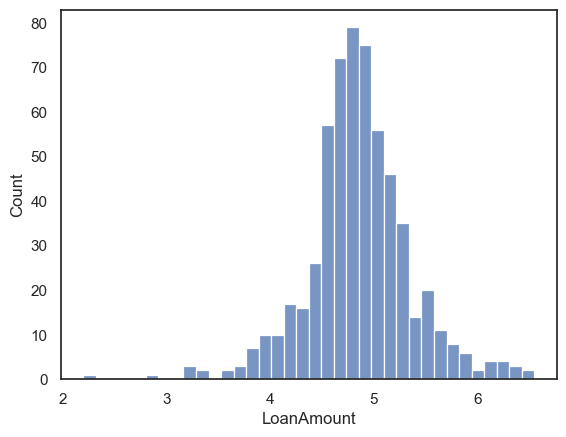

In [427]:
sns.histplot(np.log(train.LoanAmount))  # After log transformation 

<Axes: >

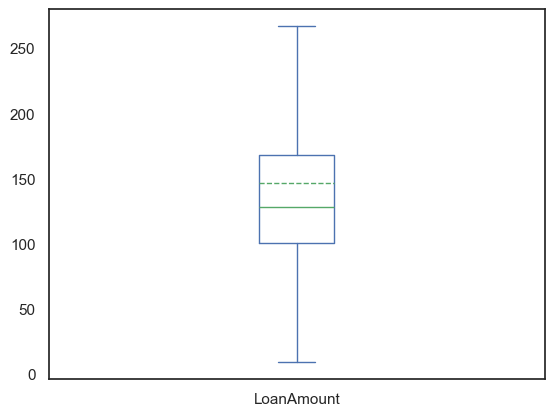

In [428]:
train.LoanAmount.plot.box(showfliers=False, meanline=True, showmeans= True)
#plt.gcf().set_size_inches(20,8)

<Axes: xlabel='LoanAmount', ylabel='Count'>

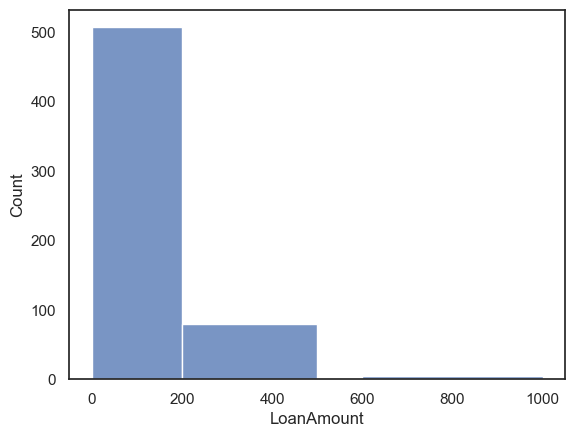

In [429]:
sns.histplot(train['LoanAmount'], bins=[0,200,500,600,1000])

<Axes: xlabel='LoanAmountTerm', ylabel='Count'>

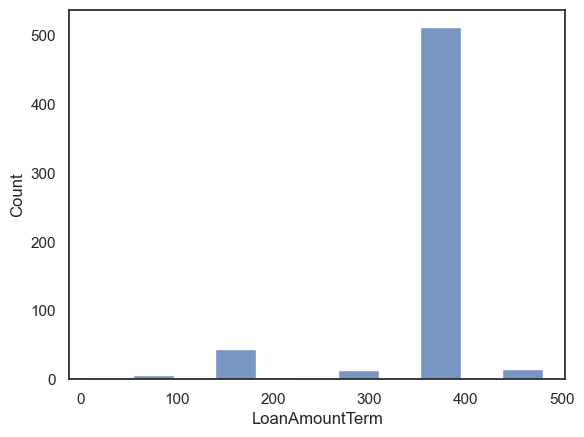

In [430]:
sns.histplot(train["LoanAmountTerm"])

In [431]:
# Convert months to years and displays dist
(train.LoanAmountTerm / 12).value_counts().sort_index()

LoanAmountTerm
1.0       1
3.0       2
5.0       2
7.0       4
10.0      3
15.0     44
20.0      4
25.0     13
30.0    512
40.0     15
Name: count, dtype: int64

##  Bivariate Analysis

In [432]:
property_group = train.pivot_table(index='PropertyArea',columns="LoanStatus", values='LoanID',aggfunc=len)

In [433]:
property_group

LoanStatus,N,Y
PropertyArea,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [434]:
train.PropertyArea.value_counts()

PropertyArea
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [435]:
# Rejection rate -  no. of nos / total 
property_group.iloc[:,0] / (property_group.iloc[:,0] + property_group.iloc[:,1])

PropertyArea
Rural        0.385475
Semiurban    0.231760
Urban        0.341584
dtype: float64

In [436]:
# Acceptance rate 
property_group.iloc[:,1] / (property_group.iloc[:,0] + property_group.iloc[:,1])

PropertyArea
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
dtype: float64

In [437]:
train.groupby(['PropertyArea','LoanStatus'])['LoanID'].count()

PropertyArea  LoanStatus
Rural         N              69
              Y             110
Semiurban     N              54
              Y             179
Urban         N              69
              Y             133
Name: LoanID, dtype: int64

In [438]:
train.groupby(['Gender','Education'], as_index=False)['ApplicantIncome'].mean()

,Gender,Education,ApplicantIncome
0,Female,Graduate,4646.467391
1,Female,Not Graduate,4629.700000
2,Male,Graduate,5992.345745
3,Male,Not Graduate,3630.061947


<Axes: xlabel='Married', ylabel='count'>

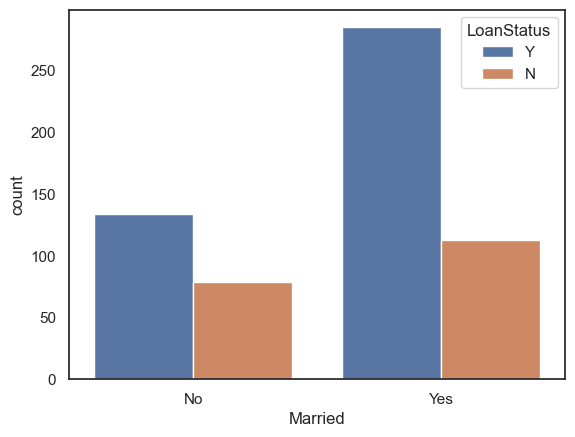

In [439]:
# d = train.groupby(by=["LoanStatus","Married"], as_index=False)['LoanID'].count()
# print(d)
# sns.catplot(x="Married",y="LoanID", hue="LoanStatus", data=d, kind="bar")
sns.countplot(x="Married", data = train, hue="LoanStatus")

In [440]:
train.pivot_table(index = "Married", columns="LoanStatus", values='LoanID',aggfunc=len)

LoanStatus,N,Y
Married,,
No,79,134
Yes,113,285


In [441]:
# Married vs. Unmarried rejection rates
(113 / (285 + 113)), (79 / (79 + 134))

(0.28391959798994976, 0.37089201877934275)

<Axes: xlabel='Dependents', ylabel='count'>

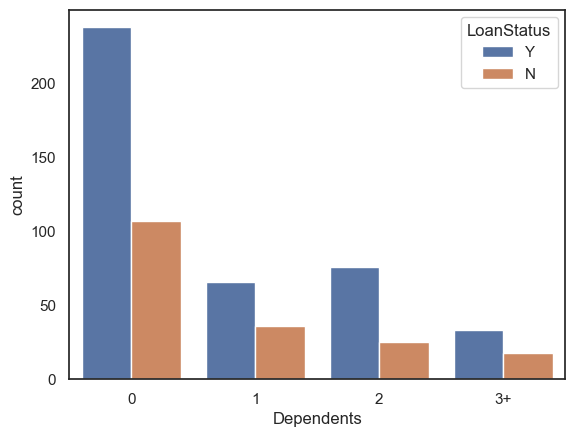

In [442]:
# d = train.groupby(by=["LoanStatus","Dependents"], as_index=False)['LoanID'].count()
# print(d)
sns.countplot(x="Dependents", hue="LoanStatus", data=train)

In [443]:
#d = train.groupby(by=["LoanStatus","Education"], as_index=False)['LoanID'].count()
#sns.catplot(x="Education",y="LoanID", hue="LoanStatus", data=d, kind="bar")

  LoanStatus SelfEmployed  LoanID
0          N           No     157
1          N          Yes      26
2          Y           No     343
3          Y          Yes      56


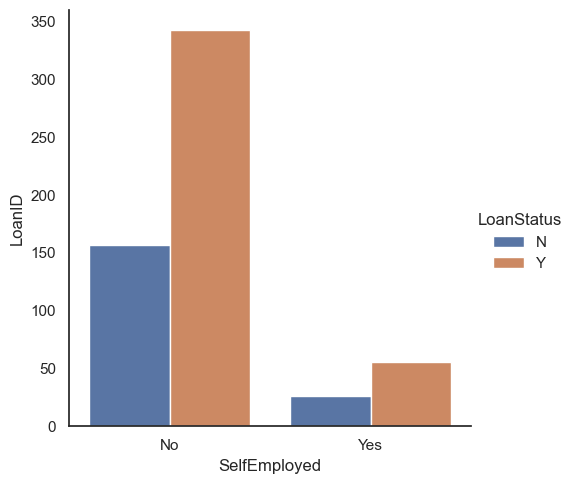

In [444]:
d = train.groupby(by=["LoanStatus","SelfEmployed"], as_index=False)['LoanID'].count()
print(d)
sns.catplot(x="SelfEmployed",y="LoanID", hue="LoanStatus", data=d, kind="bar")

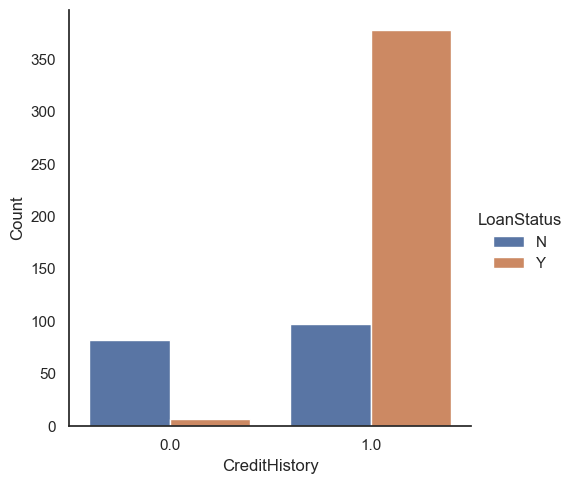

In [445]:
d = train.groupby(by=["LoanStatus","CreditHistory"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
sns.catplot(x="CreditHistory",y="Count", hue="LoanStatus", data=d, kind="bar")

  LoanStatus PropertyArea  Count
0          N        Rural     69
1          N    Semiurban     54
2          N        Urban     69
3          Y        Rural    110
4          Y    Semiurban    179
5          Y        Urban    133


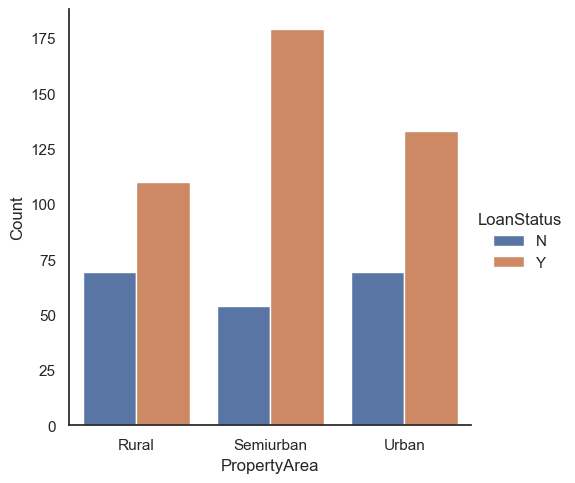

In [446]:
d = train.groupby(by=["LoanStatus","PropertyArea"], as_index=False)['LoanID'].count()
d.rename(columns={'LoanID':'Count'}, inplace=True)
print(d)
sns.catplot(x="PropertyArea",y="Count", hue="LoanStatus", data=d, kind='bar')

  LoanStatus  Gender  LoanID
0          N  Female      37
1          N    Male     150
2          Y  Female      75
3          Y    Male     339


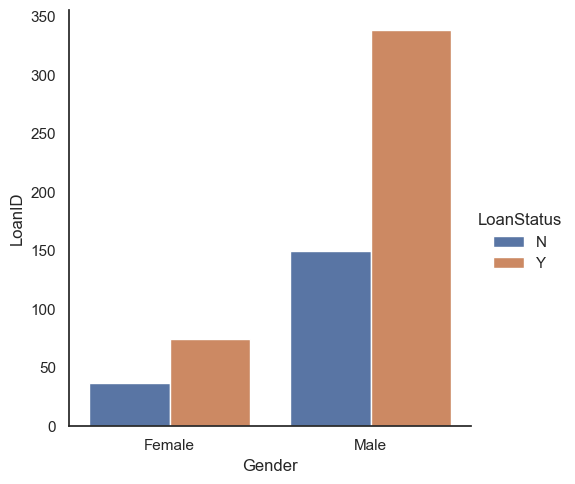

In [447]:
d = train.groupby(by=["LoanStatus","Gender"], as_index=False)['LoanID'].count()
print(d)
sns.catplot(x="Gender",y="LoanID", hue="LoanStatus", data=d, kind="bar")

In [448]:
37/75, 150/339   # Rejection rate based on gender 

(0.49333333333333335, 0.4424778761061947)

### Binning data

In [449]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,85000]
group=['Low','Average','High', 'Very high']
# Create a new column for income bin  
train['IncomeBin']= pd.cut(train['ApplicantIncome'],bins,labels=group)

In [450]:
train[['ApplicantIncome','IncomeBin']].sample(10)

,ApplicantIncome,IncomeBin
159,4583,High
86,3333,Average
601,2894,Average
52,4230,High
298,5000,High
351,8750,Very high
576,3087,Average
531,4281,High
550,6633,Very high
449,2769,Average


<Axes: xlabel='IncomeBin', ylabel='count'>

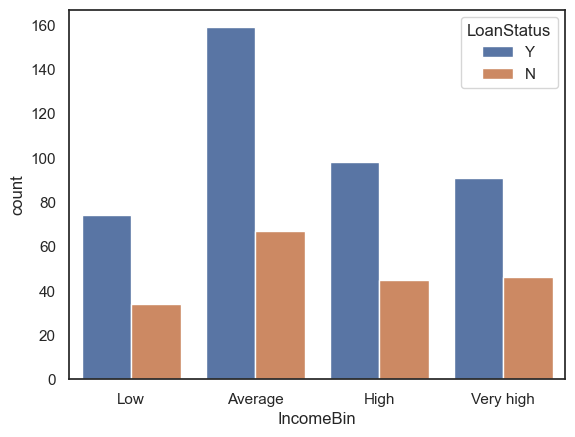

In [451]:
sns.countplot(x="IncomeBin", hue="LoanStatus", data=train)

In [452]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmountBin']=pd.cut(train['LoanAmount'],bins,labels=group)
train[['LoanAmount','LoanAmountBin']].head(10)

,LoanAmount,LoanAmountBin
0,NaN,NaN
1,128.0,Average
2,66.0,Low
3,120.0,Average
4,141.0,Average
5,267.0,High
6,95.0,Low
7,158.0,Average
8,168.0,Average
9,349.0,High


<Axes: xlabel='LoanAmountBin', ylabel='count'>

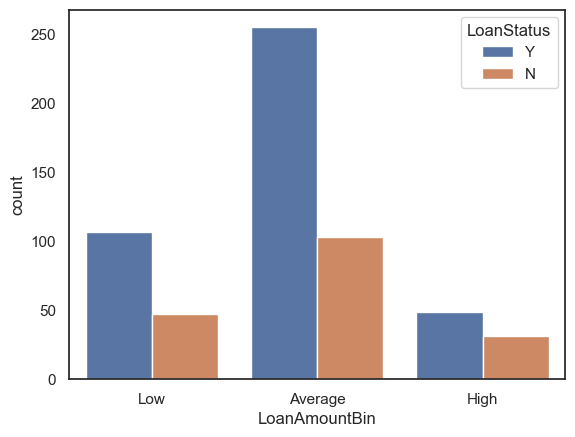

In [453]:
sns.countplot(x="LoanAmountBin", hue="LoanStatus", data=train)

### Bivariate for continuous variables 

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

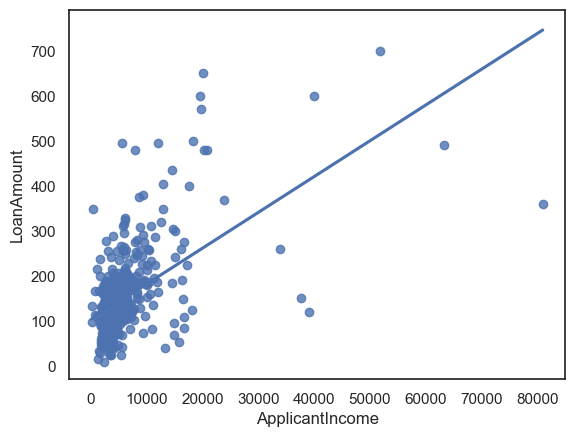

In [454]:
sns.regplot(x="ApplicantIncome", y = "LoanAmount", data = train,ci=False)

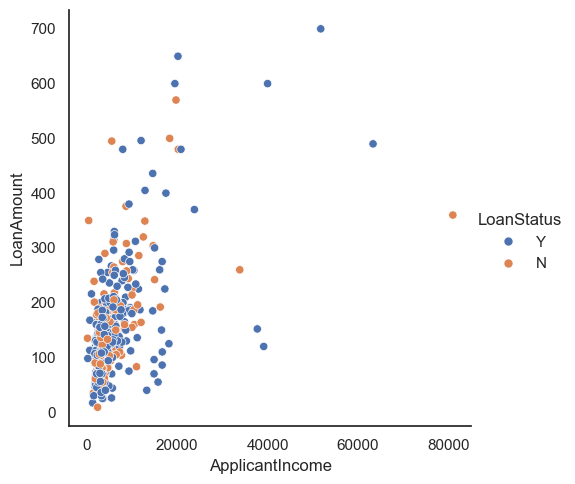

In [455]:
sns.relplot(x="ApplicantIncome", y = "LoanAmount", hue='LoanStatus', data = train)

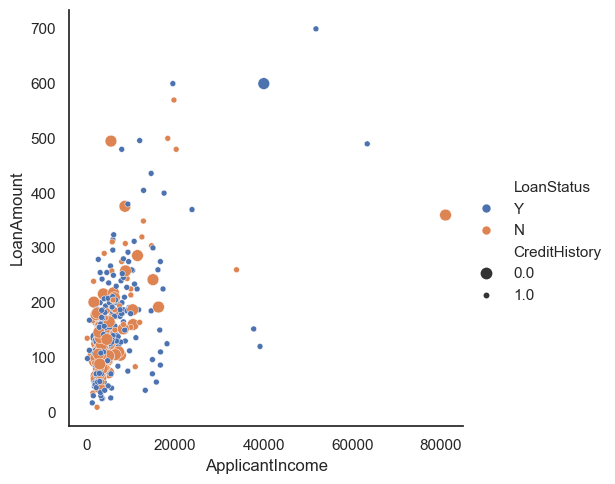

In [456]:
sns.relplot(x="ApplicantIncome", y = "LoanAmount", hue='LoanStatus', size="CreditHistory", data = train)

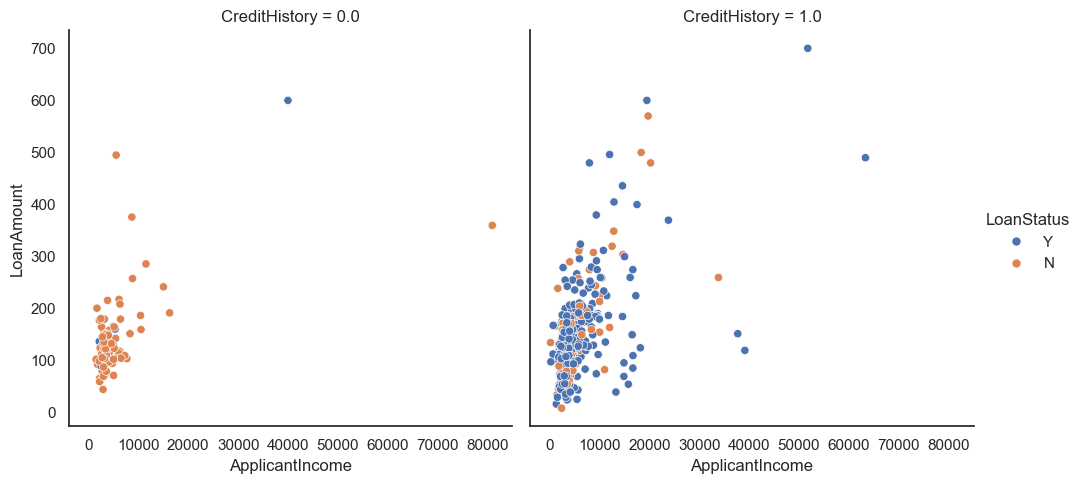

In [457]:
sns.relplot(x="ApplicantIncome", y = "LoanAmount", hue='LoanStatus',col='CreditHistory',data = train)

####  Take CoApplicantIncome and compare with loan amount and Gender

In [458]:
train.columns

Index(['LoanID', 'Gender', 'Married', 'Dependents', 'Education',
       'SelfEmployed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'LoanAmountTerm', 'CreditHistory', 'PropertyArea', 'LoanStatus',
       'IncomeBin', 'LoanAmountBin'],
      dtype='object')

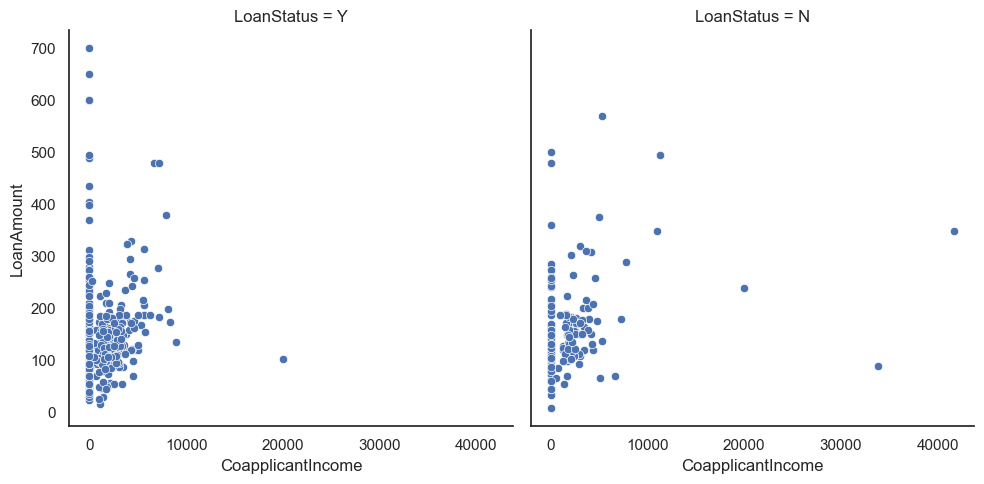

In [459]:
sns.relplot(x="CoapplicantIncome", y = "LoanAmount", col='LoanStatus', data = train)

## Data Wrangling 

In [460]:
# Drop the new variable of bins
train.drop(['IncomeBin', 'LoanAmountBin'], axis=1, inplace=True)

#### Dependents 

In [461]:
train['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [462]:
# replacing 3+ in Dependents variable with 3
#train['Dependents'].replace(to_replace ='3+', value='3',inplace=True)
train['Dependents'] = train['Dependents'].replace(to_replace ='3+', value='3')

In [463]:
train['Dependents'].value_counts()

Dependents
0    345
1    102
2    101
3     51
Name: count, dtype: int64

#### Loan_Status

In [464]:
# replacing Y and N in Loan_Status variable with 1 and 0 respectively
#train['LoanStatus'] = train['LoanStatus'].replace(to_replace =['N','Y'], value=['0','1'])

### Missing value and outlier treatment

In [465]:
# Checking the missing values
s = train.isnull().sum()
s [ s > 0]

Gender            13
Married            3
Dependents        15
SelfEmployed      32
LoanAmount        22
LoanAmountTerm    14
CreditHistory     50
dtype: int64

In [466]:
# replacing the missing values with the mode
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])

In [467]:
train['Married'] = train['Married'].fillna(train['Married'].mode()[0])
train['SelfEmployed'] = train['SelfEmployed'].fillna(train['SelfEmployed'].mode()[0])

In [468]:
# Drop rows where credit history is null 
train = train[train.CreditHistory.notnull()]

In [469]:
train.shape

(564, 13)

In [470]:
train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])

In [471]:
train['LoanAmountTerm'] = train['LoanAmountTerm'].fillna(train['LoanAmountTerm'].mode()[0])

In [472]:
train.LoanAmount.median(), train.LoanAmount.mean()

(127.0, 145.08839779005524)

In [473]:
# Replace missing values
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())

In [474]:
train.isnull().sum()

LoanID               0
Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
CreditHistory        0
PropertyArea         0
LoanStatus           0
dtype: int64

### Handle outliers in LoanAmount, ApplicantIncome, CoApplicantIncome 

In [475]:
train['Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

<Axes: >

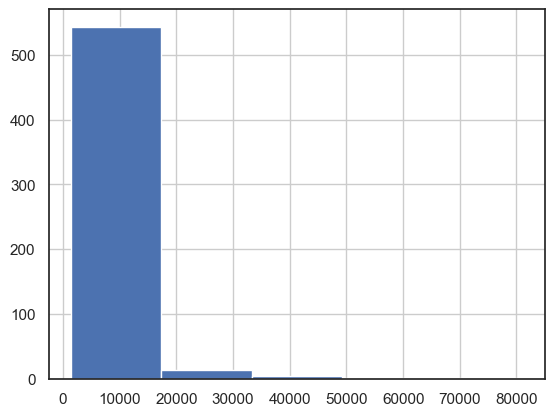

In [476]:
train['Income'].hist(bins=5)

<Axes: xlabel='Income', ylabel='Count'>

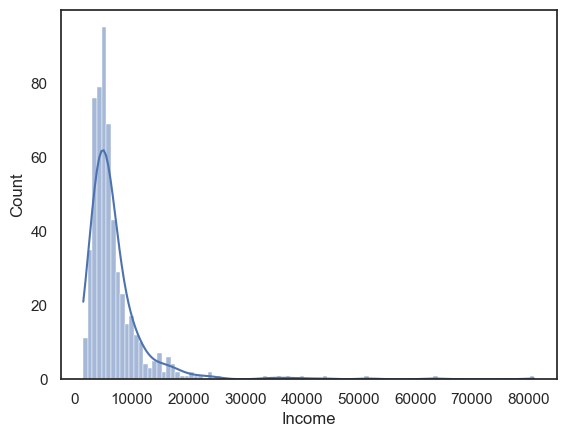

In [477]:
sns.histplot(data = train['Income'], kde=True)

<Axes: >

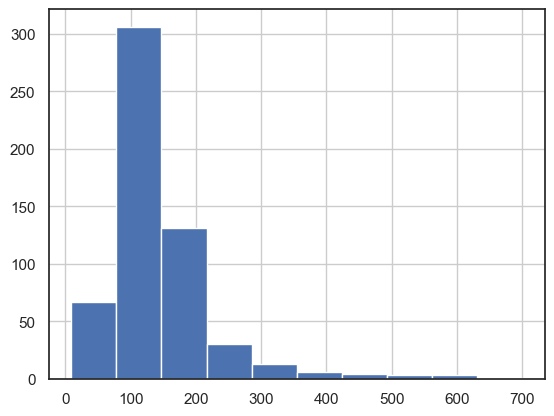

In [478]:
train['LoanAmount'].hist(bins=10)

<Axes: >

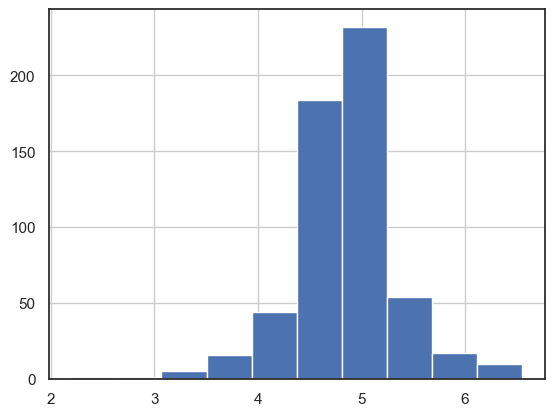

In [479]:
# Removing skewness in LoanAmount variable by log transformation
train['LoanAmountLog'] = np.log(train['LoanAmount'])
train['LoanAmountLog'].hist(bins=10)

<Axes: >

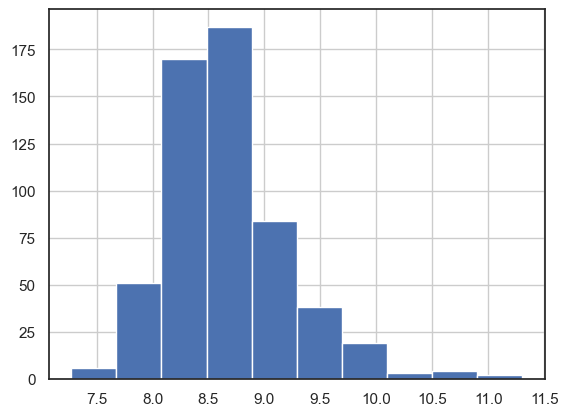

In [480]:
# Removing skewness in Income variable by log transformation
train['IncomeLog'] = np.log(train['Income'])
train['IncomeLog'].hist(bins=10)

In [481]:
train.drop(['LoanID','LoanAmount','ApplicantIncome','CoapplicantIncome','Income'],axis=1,inplace=True)

In [482]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 0 to 613
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          564 non-null    object 
 1   Married         564 non-null    object 
 2   Dependents      564 non-null    object 
 3   Education       564 non-null    object 
 4   SelfEmployed    564 non-null    object 
 5   LoanAmountTerm  564 non-null    float64
 6   CreditHistory   564 non-null    float64
 7   PropertyArea    564 non-null    object 
 8   LoanStatus      564 non-null    object 
 9   LoanAmountLog   564 non-null    float64
 10  IncomeLog       564 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


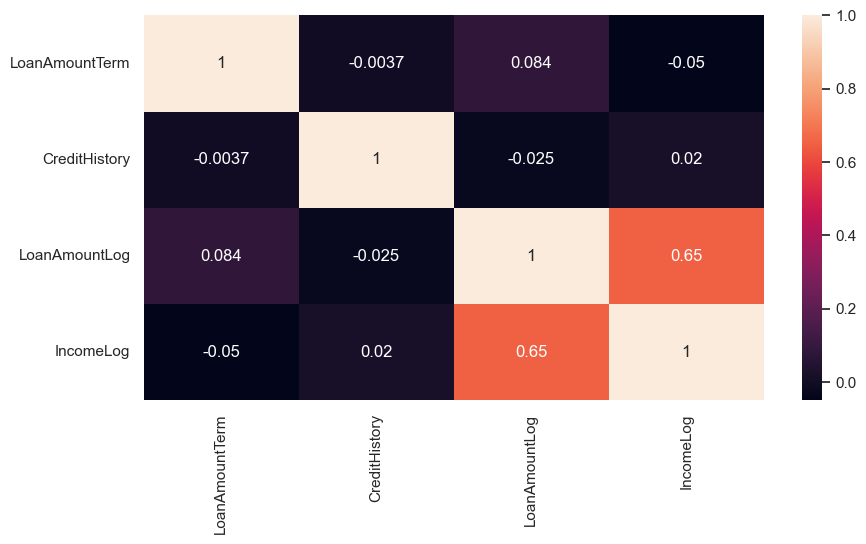

In [483]:
# Print correlation matrix to understand relationship between variables
matrix = train.corr(numeric_only = True)
# print(matrix)
sns.heatmap(matrix, annot=True)
plt.gcf().set_size_inches(10,5)

In [484]:
# Save dataframe
train.to_csv("final_train.csv",index=False)